In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### EARLY STOPPING CALLBACK

In [2]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4719 - val_loss: 0.3288
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3194 - val_loss: 0.3062
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3010 - val_loss: 0.2948
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2911 - val_loss: 0.2888
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2851 - val_loss: 0.2846
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2820 - val_loss: 0.2823
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2787 - val_loss: 0.2803
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2776 - val_loss: 0.2790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2761 - val_loss: 0.2780
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2752 - val_loss: 0.2773
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2751 - val_loss: 0.2766
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

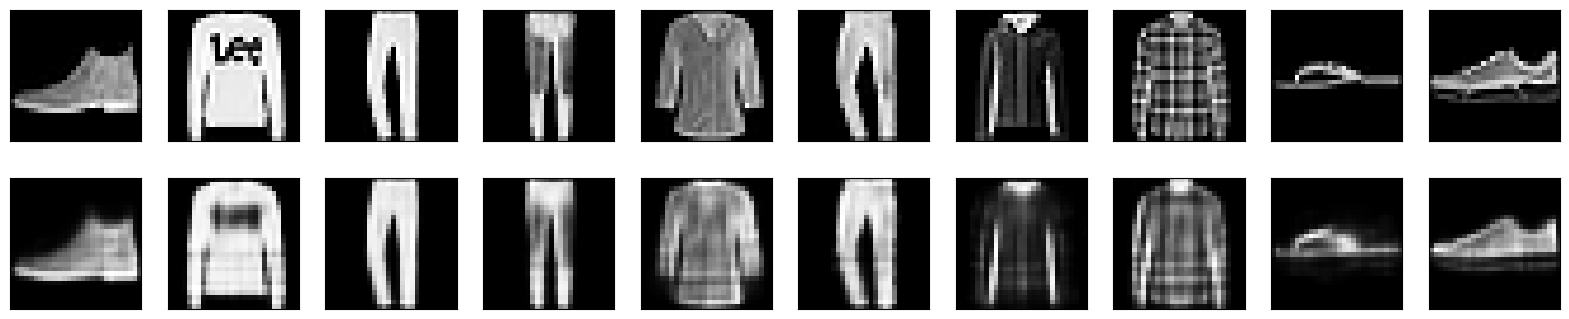

In [3]:
# Train the autoencoder with early stopping
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks = [early_stopping])

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### TERMINATE ON NaN

In [4]:
from tensorflow.keras.callbacks import TerminateOnNaN

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2693 - val_loss: 0.2722
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2697 - val_loss: 0.2723
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2700 - val_loss: 0.2723
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2695 - val_loss: 0.2722
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2705 - val_loss: 0.2722
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2696 - val_loss: 0.2722
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2701 - val_loss: 0.2723
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2695 - val_loss: 0.2722
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2703 - val_loss: 0.2721
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2695 - val_loss: 0.2721
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2694 - val_loss: 0.2722
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

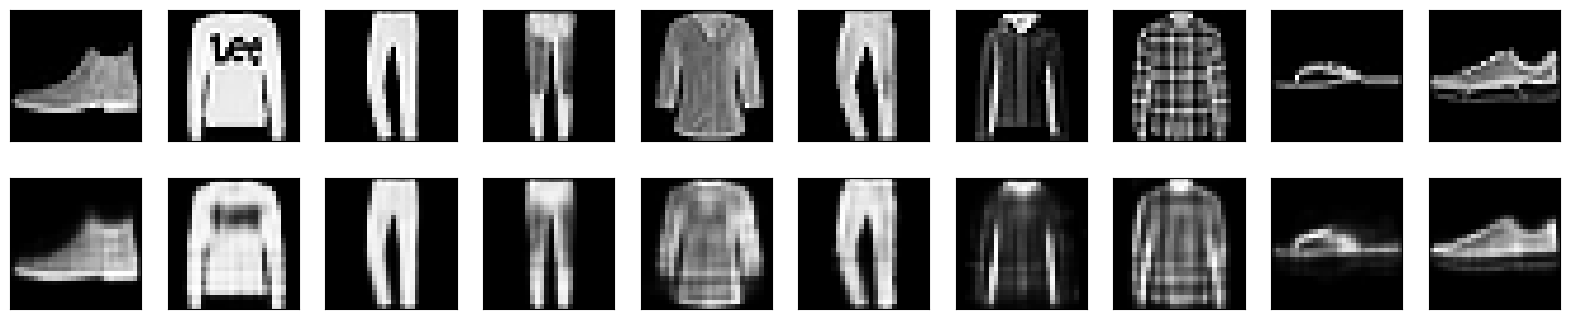

In [5]:
# Train the autoencoder with TerminateOnNaN
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks = [terminate_on_nan])

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### MODEL CHECKPOINT

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath=r'C:\Users\ldwen\Documents\Big_Data_Analytics\DSA-4620\ICP_6\autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

Epoch 1/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2692
Epoch 1: val_loss improved from inf to 0.27177, saving model to C:\Users\ldwen\Documents\Big_Data_Analytics\DSA-4620\ICP_6\autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2692 - val_loss: 0.2718
Epoch 2/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2685
Epoch 2: val_loss did not improve from 0.27177
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2685 - val_loss: 0.2718
Epoch 3/50
227/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2692
Epoch 3: val_loss improved from 0.27177 to 0.27176, saving model to C:\Users\ldwen\Documents\Big_Data_Analytics\DSA-4620\ICP_6\autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2692 - val_loss: 0.2718
Epoch 4/50
224/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2695
Epoch 4: val_loss improved from 0.27176 to 0.27169, saving model to C:\Users\ldwen\Documents\Big_Data_Analytics\DSA-4620\ICP_6\autoencoder_best.keras
235/235 ━━━━━━

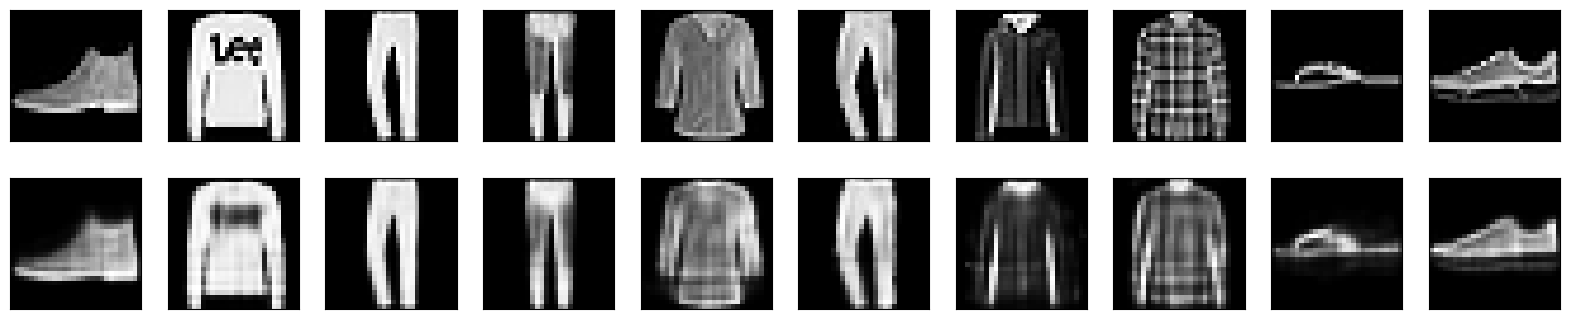

In [11]:
# Train the autoencoder with Model Checkpoint
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks = [checkpoint])

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### ReduceLROnPlateau

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2696 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2684 - val_loss: 0.2717 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2691 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 4/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2684
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2684 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2689 - val_loss: 0.2715 - learning_rate: 5.0000e-04
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2690 - val_loss: 0.2715 - learning_rate: 5.0000e-04
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2696 - val_loss: 0.2715 - learning_rate: 5.0000e-04
Epoch 8/50
223/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2689
Epoch 8: ReduceLROn

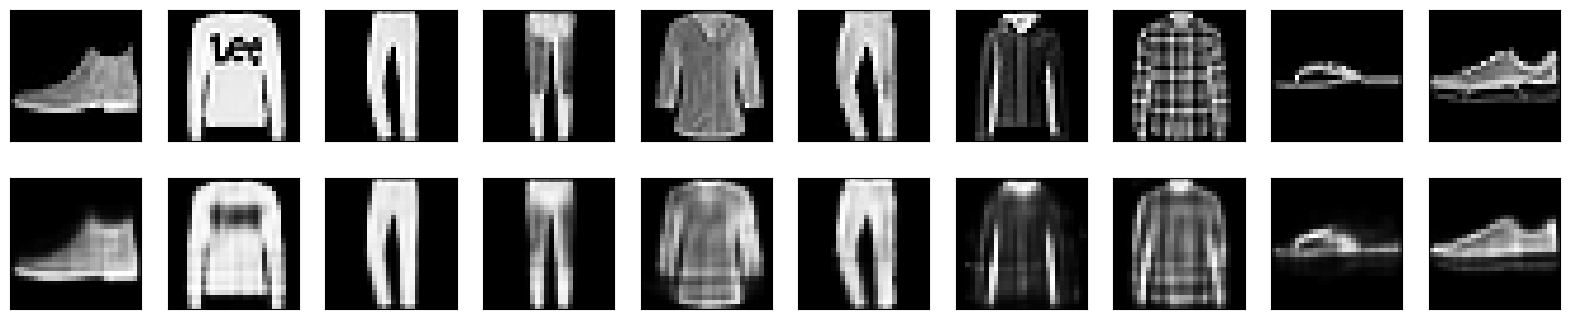

In [13]:
# Train the autoencoder with Model Checkpoint
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks = [reduce_lr])

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### ALL CALLBACKS

Epoch 1/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2673
Epoch 1: val_loss did not improve from 0.27133
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2673 - val_loss: 0.2713 - learning_rate: 1.0000e-06
Epoch 2/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2684
Epoch 2: val_loss did not improve from 0.27133
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2684 - val_loss: 0.2713 - learning_rate: 1.0000e-06
Epoch 3/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2684
Epoch 3: val_loss did not improve from 0.27133
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2684 - val_loss: 0.2713 - learning_rate: 1.0000e-06
Epoch 4/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2687
Epoch 4: val_loss improved from 0.27133 to 0.27133, saving model to C:\Users\ldwen\Documents\Big_Data_Analytics\DSA-4620\ICP_6\autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2687 - val_loss: 0.2713 - learning_rate: 1.0000e-06
Epoch 5/50
233/235 ━━━━━━━━━━

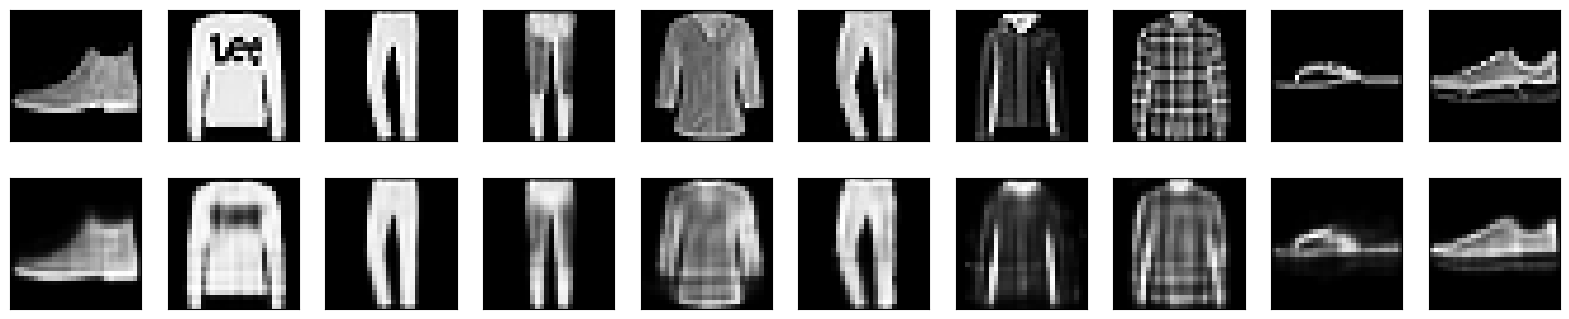

In [15]:
# Train the autoencoder with Model Checkpoint
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks = [early_stopping, terminate_on_nan, checkpoint, reduce_lr])

from tensorflow.keras.models import load_model
best_autoencoder = load_model('autoencoder_best.keras')

decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()